In [1]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data_directory = r'C:\Users\Lilly Pushparani\Downloads\Data\Data\imagestest'

image_file_paths = []
labels = []

In [3]:
for label in os.listdir(data_directory):
    label_directory = os.path.join(data_directory, label)
    if os.path.isdir(label_directory):
        for image_file in os.listdir(label_directory):
            image_file_paths.append(os.path.join(label_directory, image_file))
            labels.append(int(label))  #labels

In [4]:
images = []
for image_path in image_file_paths:
    image = load_img(image_path, target_size=(128, 128))  
    image_array = img_to_array(image)
    images.append(image_array)
X = np.array(images)
y = np.array(labels)

In [5]:

from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.5504 - loss: 42.6635 - val_accuracy: 0.6965 - val_loss: 0.5735
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.7333 - loss: 0.5264 - val_accuracy: 0.8103 - val_loss: 0.4248
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - accuracy: 0.8121 - loss: 0.4231 - val_accuracy: 0.8753 - val_loss: 0.2961
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.9062 - loss: 0.2402 - val_accuracy: 0.8943 - val_loss: 0.2616
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.9110 - loss: 0.1881 - val_accuracy: 0.9106 - val_loss: 0.2344
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.9423 - loss: 0.1560 - val_accuracy: 0.9241 - val_loss: 0.2373
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.9520 - loss: 0.1117 - val_accuracy: 0.9322 - val_loss: 0.1530
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - accuracy: 0.9803 - loss: 0.0643 - val_accuracy: 

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9579 - loss: 0.1179
Test loss: 0.1049061119556427
Test accuracy: 0.963123619556427
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       214
           1       0.99      0.94      0.96       247

    accuracy                           0.96       461
   macro avg       0.96      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



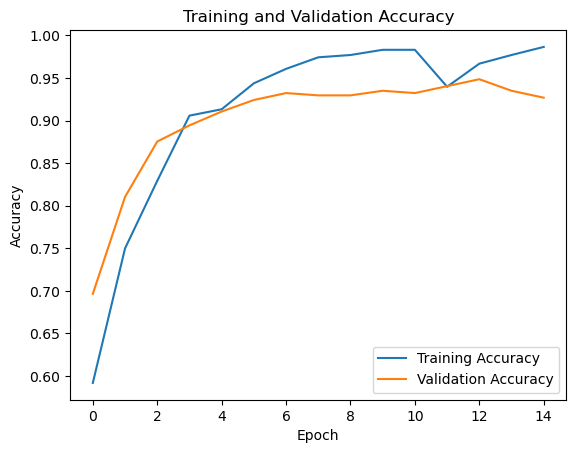

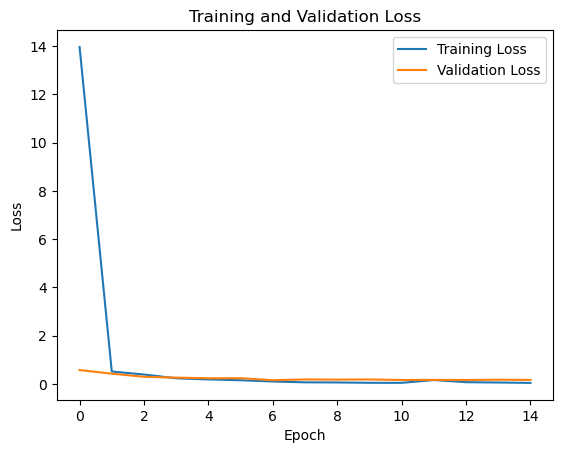

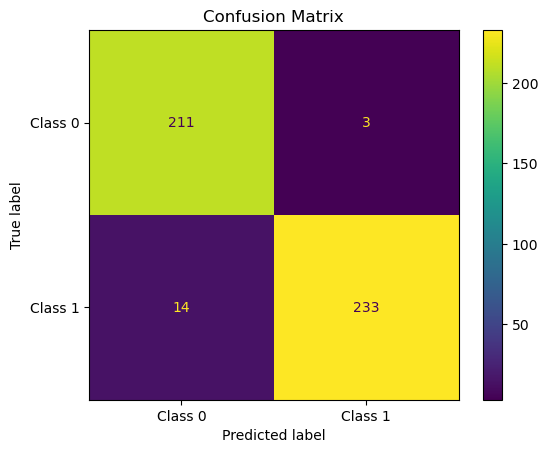

In [7]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_binary))

# accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

#loss grpah
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
labels = ['Class 0', 'Class 1']  

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


In [9]:
import numpy as np
from PIL import Image

image_path = r'C:\Users\Lilly Pushparani\Downloads\Data\Data\28\0\66.png'  # Replace this with the path to your image
image_size = (128, 128)  # Same size as the input shape of your model

# Load the image
image = Image.open(image_path)
# Resize the image to match the input size of your model
image = image.resize(image_size)
# Convert the image to a numpy array
image_array = np.array(image) / 255.0  # Normalize pixel values (assuming your model expects normalized input)

# Add an extra dimension to match the input shape of your model
image_array = np.expand_dims(image_array, axis=0)

# Predict the label of the image using your trained model
prediction = model.predict(image_array)

# Convert the prediction to a class label
predicted_class = "Class 1" if prediction > 0.5 else "Class 0"

print("Predicted Class:", predicted_class)

InvalidArgumentError: Graph execution error:

Detected at node convolution defined at (most recent call last):
<stack traces unavailable>
Depth of input must be a multiple of depth of filter: 4 vs 3

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "D:\anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
File "D:\anaconda\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
File "D:\anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
File "D:\anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
File "D:\anaconda\Lib\asyncio\base_events.py", line 607, in run_forever
File "D:\anaconda\Lib\asyncio\base_events.py", line 1922, in _run_once
File "D:\anaconda\Lib\asyncio\events.py", line 80, in _run
File "D:\anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
File "D:\anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
File "D:\anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
File "D:\anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
File "D:\anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
File "D:\anaconda\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
File "D:\anaconda\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
File "D:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
File "C:\Users\Lilly Pushparani\AppData\Local\Temp\ipykernel_8824\1208288055.py", line 18, in <module>
File "D:\anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "D:\anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 504, in predict
File "D:\anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 204, in one_step_on_data_distributed
File "D:\anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 194, in one_step_on_data
File "D:\anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 92, in predict_step
File "D:\anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "D:\anaconda\Lib\site-packages\keras\src\layers\layer.py", line 842, in __call__
File "D:\anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "D:\anaconda\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__
File "D:\anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler
File "D:\anaconda\Lib\site-packages\keras\src\models\sequential.py", line 206, in call
File "D:\anaconda\Lib\site-packages\keras\src\models\functional.py", line 199, in call
File "D:\anaconda\Lib\site-packages\keras\src\ops\function.py", line 151, in _run_through_graph
File "D:\anaconda\Lib\site-packages\keras\src\models\functional.py", line 589, in call
File "D:\anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "D:\anaconda\Lib\site-packages\keras\src\layers\layer.py", line 842, in __call__
File "D:\anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "D:\anaconda\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__
File "D:\anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler
File "D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 243, in call
File "D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 233, in convolution_op
File "D:\anaconda\Lib\site-packages\keras\src\ops\nn.py", line 909, in conv
File "D:\anaconda\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 279, in conv
File "D:\anaconda\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 269, in _conv_xla
File "D:\anaconda\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 256, in _conv

	 [[{{node convolution}}]]
	tf2xla conversion failed while converting __inference__conv_xla_13739[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[sequential_1/conv2d_1/StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_13787]

In [13]:
import numpy as np
from PIL import Image

# Load and preprocess the image
image_path = r'C:\Users\Lilly Pushparani\Downloads\Data\Data\28\1\1.png'
# Replace this with the path to your image
image_size = (128, 128)  # Same size as the input shape of your model

# Load the image
image = Image.open(image_path).convert("RGB")
# Resize the image to match the input size of your model
image = image.resize(image_size)
# Convert the image to a numpy array
image_array = np.array(image) / 255.0  # Normalize pixel values (assuming your model expects normalized input)
# Load the image and convert it to RGB mode


# Add an extra dimension to match the input shape of your model
image_array = np.expand_dims(image_array, axis=0)

# Predict the label of the image using your trained model
prediction = model.predict(image_array)

# Convert the prediction to a class label
predicted_class = "Stressed" if prediction[0][0] > 0.5 else "Not stressed"

print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class: Class 1


In [11]:
print("Shape of input image array:", image_array.shape)
print("Expected input shape of the model:", model.input_shape)


Shape of input image array: (1, 128, 128, 4)
Expected input shape of the model: (None, 128, 128, 3)


In [15]:
model_path = r'C:\Users\Lilly Pushparani\Downloads\Data\Data\Stress_detection.h5'  # Replace "path_to_save_model" and "model_name" with your desired file path and name

# Save the model
model.save(model_path)

print("Model saved successfully at:", model_path)

Model saved successfully at: C:\Users\Lilly Pushparani\Downloads\Data\Data\Stress_detection.h5
